# Evaluation: Precision & Recall
## Using the evaluation metrics we have learned, we are going to compare how well some different types of classifiers perform on different evaluation metrics
### We are going to use a dataset of written numbers which we can import from sklearn. Run the code below to do so. 


In [4]:
import numpy as np
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
X, y = mnist['data'], mnist['target']

### Now take a look at the shapes of the X and y matricies 

In [11]:
X.shape

(70000, 784)

In [14]:
y.shape

(70000,)

### Now, let's pick one entry and see what number is written. Use indexing to pick the 36000th digit

In [22]:
X[36000]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [23]:
y[36000]

'9'

### You can use the .reshape(28,28) function and plt.imshow() function with the parameters cmap = matplotlib.cm.binary, interpolation="nearest" to make a plot of the number. Be sure to import matplotlib!

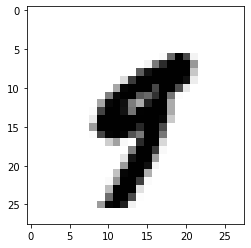

In [28]:
import matplotlib.pyplot as plt 

plt.imshow(X[36000].reshape(28,28), cmap = plt.cm.binary, interpolation="nearest")

### Use indexing to see if what the plot shows matches with the outcome of the 36000th index

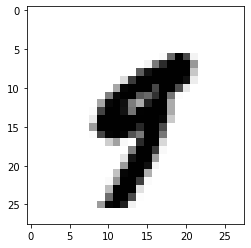

In [29]:
plt.imshow(X[36000].reshape(28,28), cmap = plt.cm.binary, interpolation="nearest")

### Now lets break into a test train split to run a classification. Instead of using sklearn, use indexing to select the first 60000 entries for the training, and the rest for training.

In [44]:



X_train = X[0:60000]

y_train = y[0:60000]

X_test = X[-10000:]

y_test = y[-10000:]

### We are going to make a two-class classifier, so lets restrict to just one number, for example 5s. Do this by defining a new y training and y testing sets for just the number 5

In [47]:

y_test

array(['7', '2', '1', ..., '4', '5', '6'], dtype=object)

In [49]:
five_select = lambda x: 1 if x == "5" else 0

y_train2 = np.array(list(map(five_select, y_train)))


y_test2 = np.array(list(map(five_select, y_test)))

### Lets train a logistic regression to predict if a number is a 5 or not (remember to use the 'just 5s' y training set!)

In [52]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

logreg.fit(X_train, y_train2)

/Users/alessandro/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [54]:
y_pred = logreg.predict(X_train)

### Does the classifier predict correctly the 36000th digit we picked before?

In [55]:
y_pred[36000]

0

### To make some comparisons, we are going to make a very dumb classifier, that never predicts 5s. Build the classifier with the code below, and call it using: never_5_clf = Never5Classifier()

In [51]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

never_5_clf = Never5Classifier()

### Now lets fit and predict on the testing set using our never 5 Classifier

In [80]:
never_5_clf.fit(X_train)

y_never = never_5_clf.predict(X_train)

### Let's compare this to the Logistic Regression. Examine the confusion matrix, precision, recall, and f1_scores for each. What is the probability cutoff you are using to decide the classes?

In [67]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

confusion_matrix(y_train2, y_pred)

array([[54151,   428],
       [  876,  4545]])

In [75]:
precision = precision_score(y_train2, y_pred)
recall = recall_score(y_train2, y_pred)
f1_score = f1_score(y_train2, y_pred)

TypeError: 'numpy.float64' object is not callable

In [76]:
print(precision)
print(recall)

print(f1_score)


0.9139352503519003
0.8384061981184283
0.8745430055801424


In [87]:
confusion_matrix(y_train2, y_never)
precision = precision_score(y_train2, y_pred)
#recall = recall_score(y_train2, y_never)
#f1_score = f1_score(y_train2, y_never)

In [88]:
print(precision)
print(recall)
print(f1_score)


0.9139352503519003
0.0
0.8745430055801424


### What are the differences you see? Without knowing what each model is, what can these metrics tell you about how well each works?

In [ ]:
'''
one does not have any recall
'''

### Now let's examine the roc_curve for each. Use the roc_curve method from sklearn.metrics to help plot the curve for each

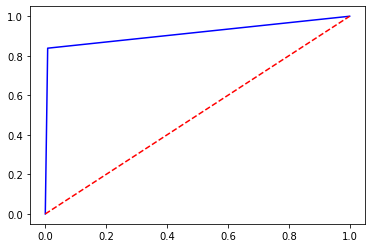

In [92]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train2, y_pred)
plt.plot(fpr, tpr, 'b')
plt.plot([0,1], [0,1], 'r--')
plt.show()

### Now find the roc_auc_score for each. 

In [96]:
from sklearn import metrics
roc_auc_score = metrics.roc_auc_score(y_train2, y_pred)

roc_auc_score2 = metrics.roc_auc_score(y_train2, y_never)

print(roc_auc_score)

print(roc_auc_score2)

0.9152821770928901
0.5


### What does this metric tell you? Which classifier works better with this metric in mind?

In [97]:
'''
the second one is worst
'''

'\nthe second one is worst\n'